In [4]:
import csv
import pandas
import datetime
df = pandas.read_csv('Data/data.csv')


In [5]:
input_lote = "GMX00223"
df = df[df["Lote"].str.contains(input_lote)]
df = df[["Lote","Fecha","Tazas de alimento","Litros de agua"]]
df['Fecha'] = pandas.to_datetime(df['Fecha'])
for i in df.index:
    df.loc[i, "Fecha"] = pandas.to_datetime(df.loc[i,"Fecha"])

df["Tazas de alimento"] = df["Tazas de alimento"].fillna(0)
df["Litros de agua"] = df["Litros de agua"].fillna(0)
df.dtypes

Lote                         object
Fecha                datetime64[ns]
Tazas de alimento           float64
Litros de agua              float64
dtype: object

In [6]:
df

,Lote,Fecha,Tazas de alimento,Litros de agua
1,"GMX00123-01,GMX00223-01",2023-01-30 08:20:00,2.0,0.0
2,"GMX00123-01,GMX00223-01,GMX00323-01,GMX36122-0...",2023-01-26 08:36:00,2.0,0.0
3,"GMX00123-01,GMX00223-01,GMX00323-01,GMX36322-0...",2023-10-02 08:16:00,2.0,0.0
4,"GMX00123-01,GMX00223-01,GMX36222-01,GMX35822-0...",2023-01-24 08:12:00,1.0,0.0
6,"GMX00223-01,GMX00123-01",2023-01-17 16:31:00,1.0,0.0
7,"GMX00223-01,GMX00123-01",2023-01-20 08:34:00,2.0,0.0
8,"GMX00223-01,GMX00123-01",2023-01-23 08:57:00,2.0,0.0
9,"GMX00223-01,GMX00123-01",2023-01-25 08:17:00,2.0,0.0
10,"GMX00223-01,GMX00123-01",2023-01-27 08:45:00,2.0,0.0
11,"GMX00223-01,GMX00123-01",2023-09-02 07:57:00,1.0,0.0


<Figure size 640x480 with 0 Axes>

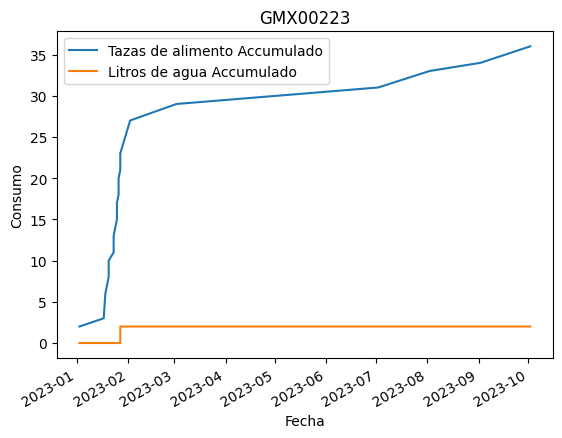

In [8]:
import matplotlib.pyplot as plt
import statistics
df = df.sort_values(by=["Fecha"])
df["Tazas de alimento Accumulado"] = df["Tazas de alimento"].cumsum()
df["Litros de agua Accumulado"] = df["Litros de agua"].cumsum()
plt.figure()
ax = df.plot(x="Fecha", y=["Tazas de alimento Accumulado", "Litros de agua Accumulado"])
plt.xlabel("Fecha")
plt.ylabel("Consumo")
plt.title(input_lote)
plt.savefig("Results/" + input_lote + ".jpg", dpi=72)
# ax = df.plot(x="Fecha", secondary_y=["Litros de agua","Tazas de alimento"])
